# Hourly Energy Consumption

## Aggregation and Resampling Analysis

In [1]:
#-----------------------------------------------------------------------------------------
# Name:        Practice Day 4
# Author:      Erick Rico
# Created:     06/08/2025
#-----------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("PJME_hourly.csv")

In [4]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [6]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [7]:
type(df["Datetime"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df = df.set_index("Datetime")

### Frecuencia Diaria ("D")

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

resampled_df = df.resample("D").mean()
resampled_df

,PJME_MW
Datetime,
2002-01-01,"31,080.74"
2002-01-02,"34,261.54"
2002-01-03,"34,511.88"
2002-01-04,"33,715.46"
2002-01-05,"30,405.12"
...,...
2018-07-30,"32,957.42"
2018-07-31,"34,539.08"
2018-08-01,"39,230.79"


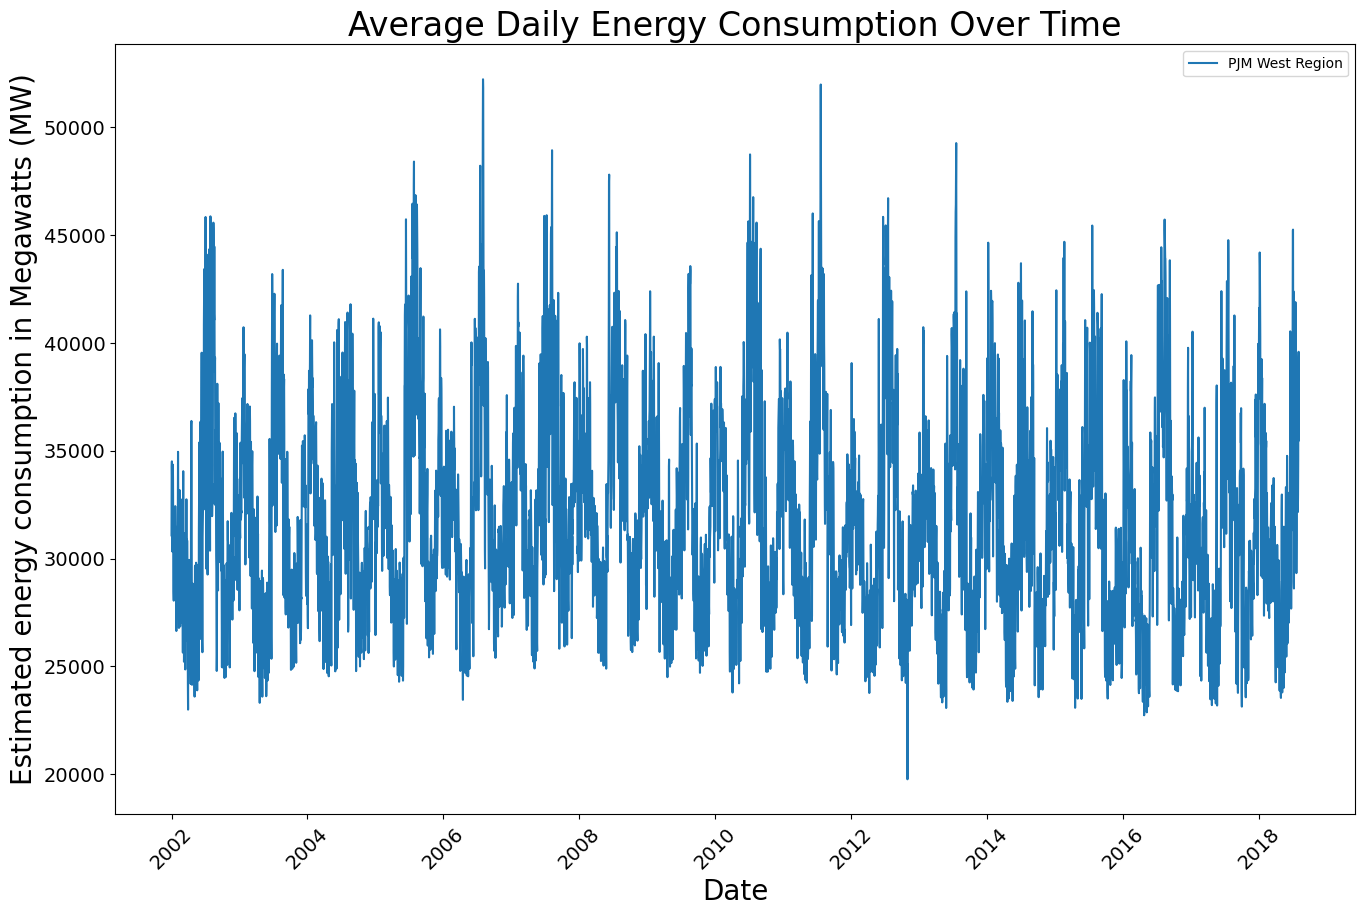

In [10]:
plt.figure(figsize=(16,10))
plt.plot(resampled_df.index, resampled_df["PJME_MW"], label="PJM West Region")
plt.title("Average Daily Energy Consumption Over Time", fontsize=24)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Estimated energy consumption in Megawatts (MW)", fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

In [11]:
# Confirmando que mis datos sean diarios
print(resampled_df.index[:40])
resampled_df.index.diff().value_counts()

DatetimeIndex(['2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04',
               '2002-01-05', '2002-01-06', '2002-01-07', '2002-01-08',
               '2002-01-09', '2002-01-10', '2002-01-11', '2002-01-12',
               '2002-01-13', '2002-01-14', '2002-01-15', '2002-01-16',
               '2002-01-17', '2002-01-18', '2002-01-19', '2002-01-20',
               '2002-01-21', '2002-01-22', '2002-01-23', '2002-01-24',
               '2002-01-25', '2002-01-26', '2002-01-27', '2002-01-28',
               '2002-01-29', '2002-01-30', '2002-01-31', '2002-02-01',
               '2002-02-02', '2002-02-03', '2002-02-04', '2002-02-05',
               '2002-02-06', '2002-02-07', '2002-02-08', '2002-02-09'],
              dtype='datetime64[ns]', name='Datetime', freq='D')


Datetime
1 days    6058
Name: count, dtype: int64

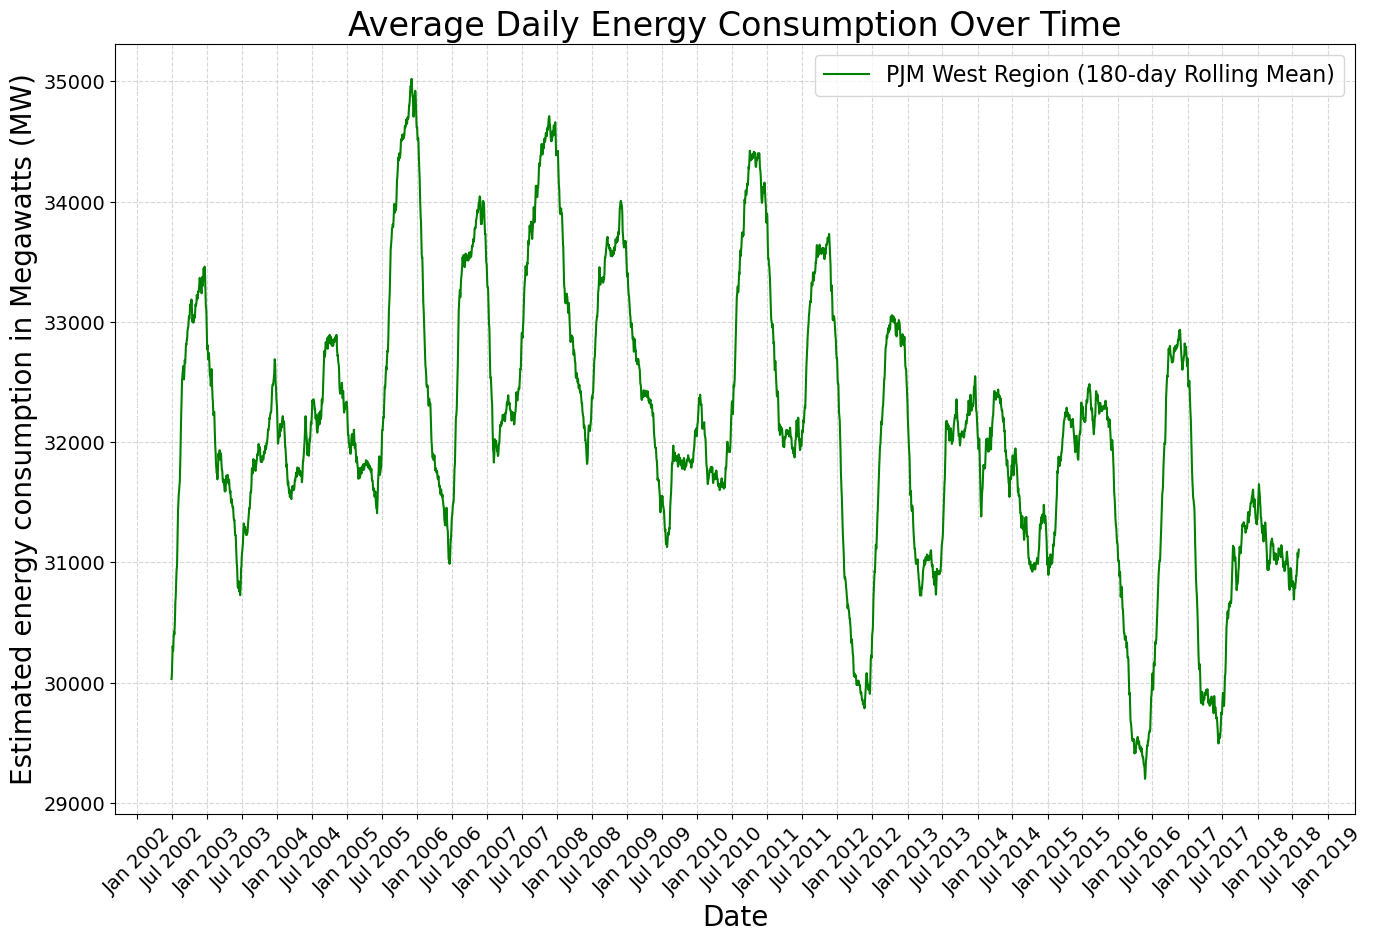

In [12]:
import matplotlib.dates as mdates

# Mejorando el gráfico con rolling
roll_df = resampled_df["PJME_MW"].rolling(window=180).mean()

plt.figure(figsize=(16,10))
plt.plot(resampled_df.index, roll_df, label="PJM West Region (180-day Rolling Mean)", color="green")
plt.title("Average Daily Energy Consumption Over Time", fontsize=24)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Estimated energy consumption in Megawatts (MW)", fontsize=20)

# Mostrar ticks cada 6 meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))  # Enero y Julio
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.grid(ls="--", alpha=0.5)
plt.savefig("smoothed_avg_daily_energy_consumption.png", dpi=300, bbox_inches="tight")
plt.show()

- Es notorio que los periodos de mayor consumo de energía es en el primer semestre de cada año. Esto puede deberse a periodos invernales con calefacción seguidos de periodos de calor con ventilación. Luego, en los segundos semestres es como si las personas se acostumbran un poco al calor, pero también coincide con la disminución de temperatura paulatinamente hasta llegar nuevamente a los periodos de mucho frío.

### Frecuencia Mensual ("ME")

In [13]:
resampled_m_df = df.resample("ME").mean()
resampled_m_df

,PJME_MW
Datetime,
2002-01-31,"31,075.40"
2002-02-28,"30,239.17"
2002-03-31,"28,875.26"
2002-04-30,"28,534.73"
2002-05-31,"28,073.65"
...,...
2018-04-30,"27,353.27"
2018-05-31,"28,599.95"
2018-06-30,"32,014.47"


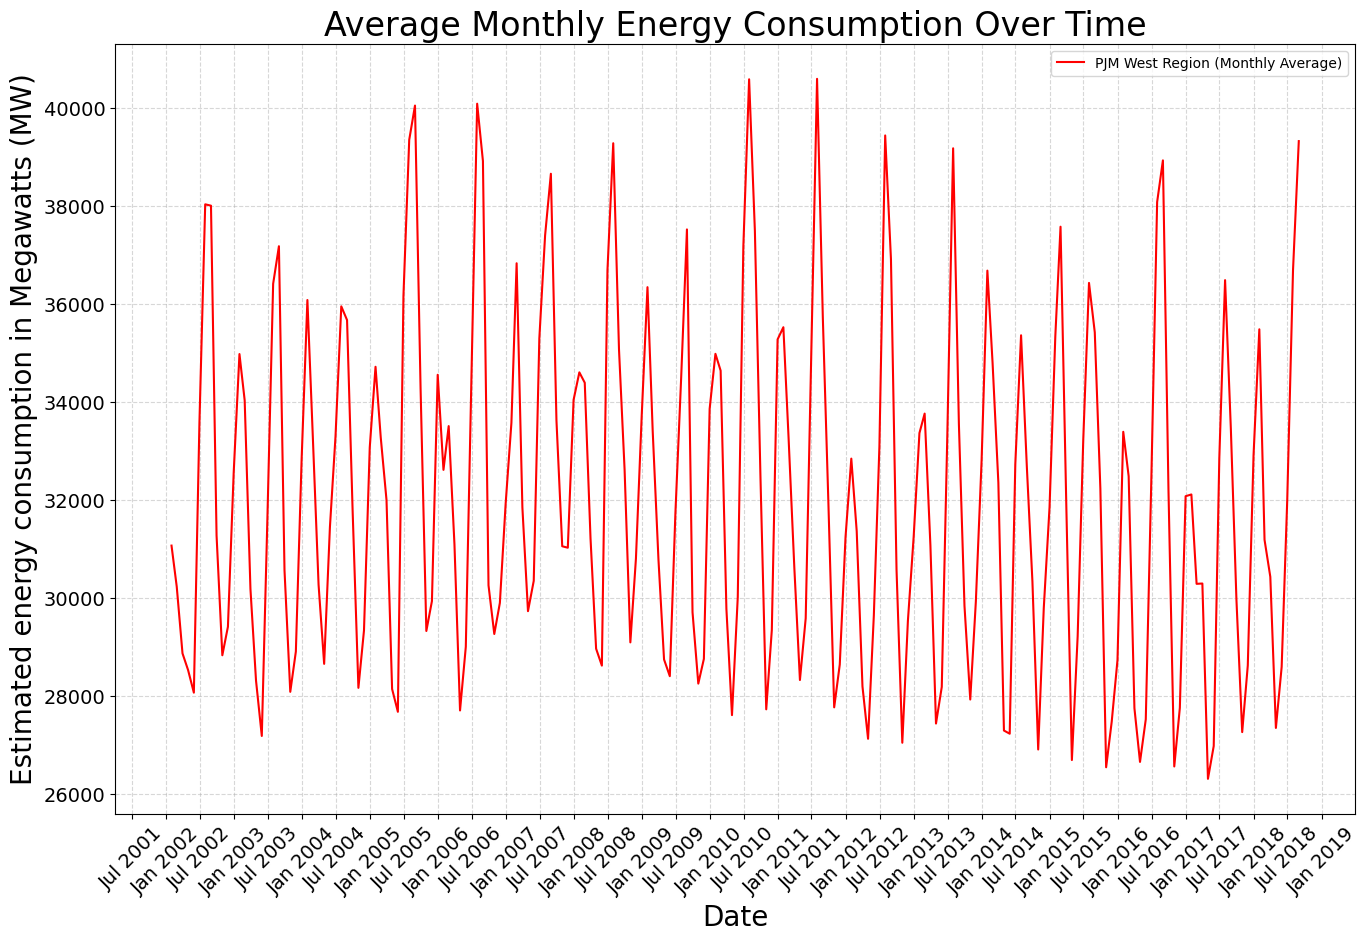

In [18]:
plt.figure(figsize=(16,10))
plt.plot(resampled_m_df.index, resampled_m_df["PJME_MW"], label="PJM West Region (Monthly Average)", color="red")
plt.title("Average Monthly Energy Consumption Over Time", fontsize=24)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Estimated energy consumption in Megawatts (MW)", fontsize=20)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(ls="--", alpha=0.5)
plt.savefig("avg_monthly_energy_consumption.png", dpi=300, bbox_inches="tight")
plt.show()

Al comparar el gráfico de promedios mensuales con el gráfico suavizado diario, ambos muestran el mismo patrón principal: el consumo de energía es mayor en el primer semestre de cada año. Sin embargo, hay algunas diferencias y ventajas en la visualización mensual:

- El gráfico mensual elimina el “ruido” de las variaciones diarias, haciendo que la tendencia estacional sea aún más clara y fácil de identificar.
- Los picos y valles se ven más suavizados, lo que ayuda a enfocar la atención en los cambios de consumo a lo largo de los años y no en fluctuaciones puntuales.
- Es más sencillo comparar año con año, ya que cada punto representa un mes y no un día, facilitando la observación de patrones repetitivos.
- En resumen, el patrón de mayor consumo en el primer semestre sigue siendo el más visible, pero el gráfico mensual lo muestra de forma más limpia y menos saturada, ideal para análisis de tendencias y estacionalidad a largo plazo.

---

In [15]:
#-----------------------------------------------------------------------------------------
# Name:        Practice Day 5
# Author:      Erick Rico
# Created:     07/08/2025
#-----------------------------------------------------------------------------------------

### Frecuencia Semanal ("W")

In [26]:
resampled_w_df = df.resample("W").mean()
resampled_w_df

,PJME_MW
Datetime,
2002-01-06,"32,392.16"
2002-01-13,"31,487.39"
2002-01-20,"31,452.88"
2002-01-27,"30,141.53"
2002-02-03,"29,196.49"
...,...
2018-07-08,"38,459.98"
2018-07-15,"36,420.04"
2018-07-22,"35,612.10"


In [17]:
resampled_w_df.index.diff().value_counts()

Datetime
7 days    865
Name: count, dtype: int64

In [19]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [20]:
pd.plotting.register_matplotlib_converters()

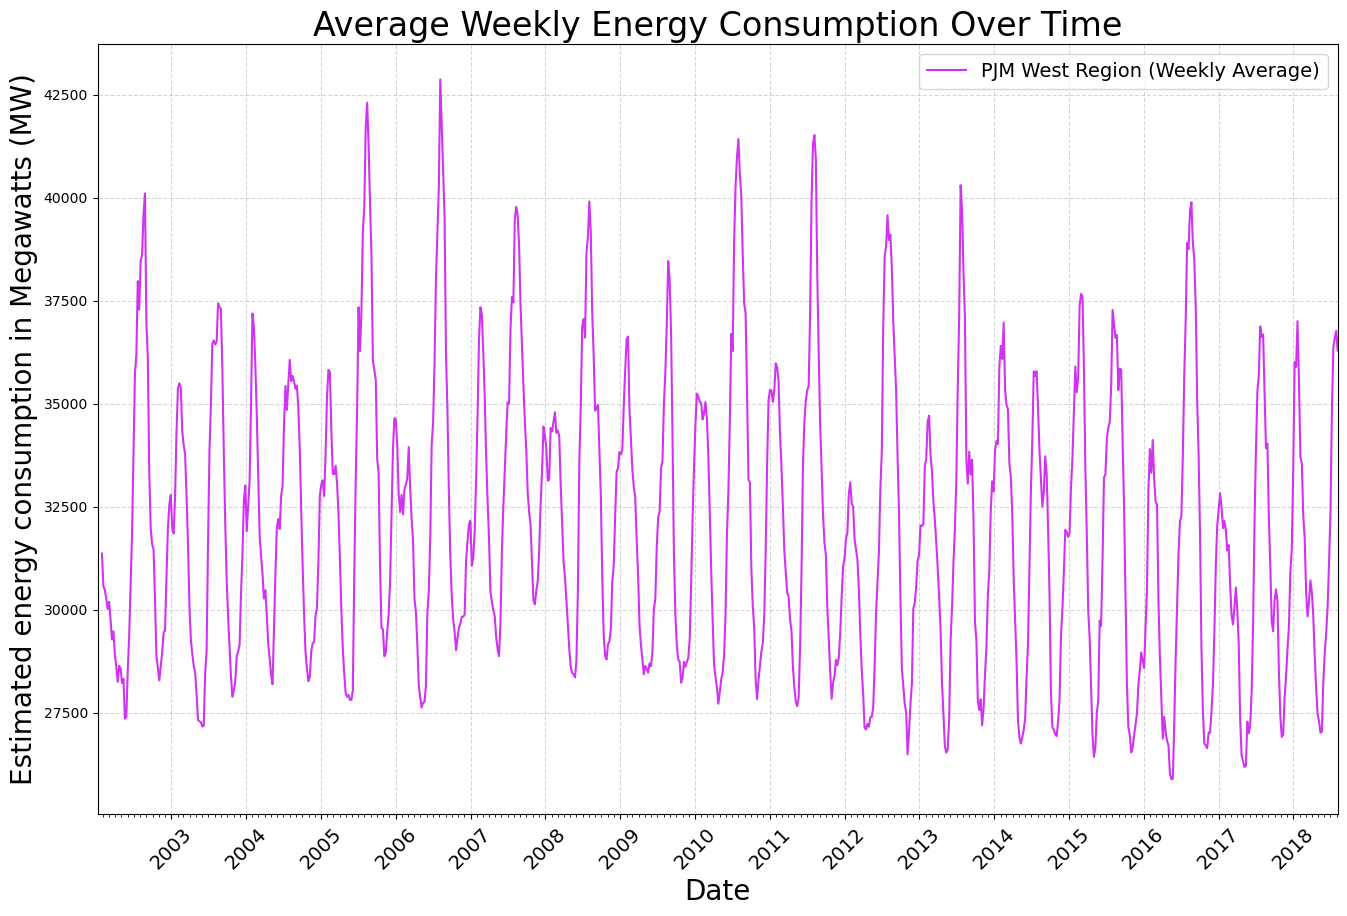

In [38]:
roll_w_df = resampled_w_df[["PJME_MW"]].rolling(window=4).mean() # N = 4 -> 1 mes

fig, ax = plt.subplots(figsize=(16, 10), dpi=100)

ax.plot(resampled_w_df.index, roll_w_df["PJME_MW"], 
         label="PJM West Region (Weekly Average)", color="#D134F0")

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.setp(ax.get_xticklabels(), rotation=45, fontsize=14)

ax.set_xlim(resampled_w_df.index.min(), resampled_w_df.index.max())

ax.set_xlabel("Date", fontsize=20) 
ax.set_ylabel("Estimated energy consumption in Megawatts (MW)", fontsize=20)
plt.title("Average Weekly Energy Consumption Over Time", fontsize=24)

ax.legend(fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.savefig("smoothed_avg_weekly_energy_consumption.png", dpi=300, bbox_inches="tight")

plt.show()

### Frecuencia Anual ("YE")

In [28]:
resampled_y_df = df.resample("YE").mean()
resampled_y_df

,PJME_MW
Datetime,
2002-12-31,"31,565.62"
2003-12-31,"31,698.76"
2004-12-31,"32,270.43"
2005-12-31,"33,310.48"
2006-12-31,"32,409.27"
2007-12-31,"33,613.47"
2008-12-31,"32,929.59"
2009-12-31,"31,851.53"
2010-12-31,"33,101.17"


In [29]:
resampled_y_df.index.diff().value_counts()

Datetime
365 days    12
366 days     4
Name: count, dtype: int64

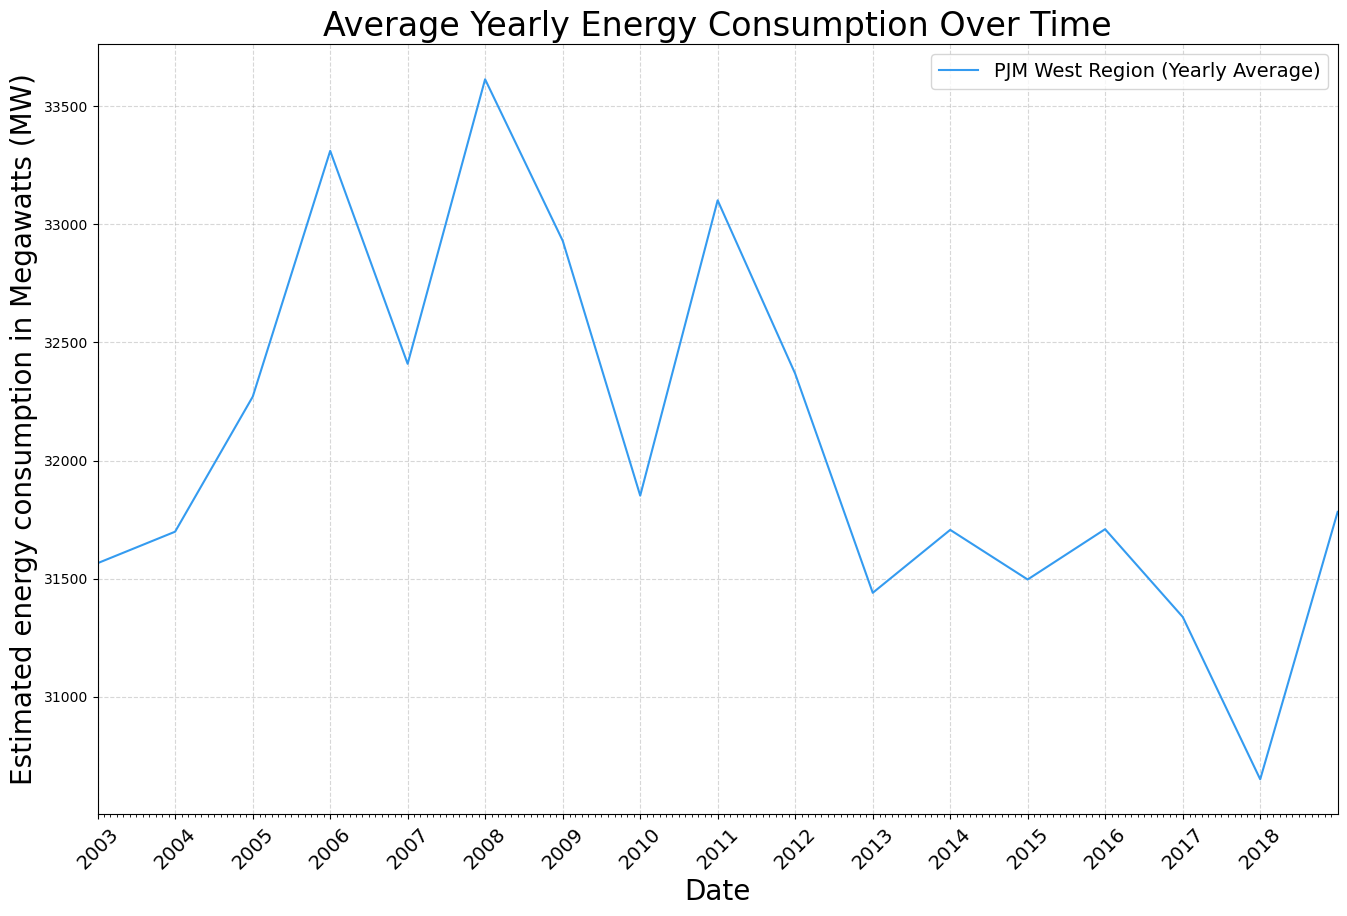

In [39]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=100)

ax.plot(resampled_y_df.index, resampled_y_df["PJME_MW"], 
         label="PJM West Region (Yearly Average)", color="#349BF0")

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.setp(ax.get_xticklabels(), rotation=45, fontsize=14)

ax.set_xlim(resampled_y_df.index.min(), resampled_y_df.index.max())

ax.set_xlabel("Date", fontsize=20) 
ax.set_ylabel("Estimated energy consumption in Megawatts (MW)", fontsize=20)
plt.title("Average Yearly Energy Consumption Over Time", fontsize=24)

ax.legend(fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.savefig("avg_yearly_energy_consumption.png", dpi=300, bbox_inches="tight")

plt.show()

**Conclusiones:**

- La frecuencia de remuestreo influye directamente en el nivel de ruido y en la claridad con la que se pueden identificar los patrones temporales.

- Cada gráfico revela distintos patrones: en la frecuencia diaria, el ruido es muy alto debido a la variabilidad propia de cada día, por lo que se aplicó un rolling de 6 meses para resaltar mejor las tendencias. En la frecuencia mensual, no fue necesario suavizar, ya que los patrones estacionales se aprecian claramente. Para la frecuencia semanal, la variabilidad de cada 7 días también generaba ruido, así que se utilizó un rolling de 1 mes, logrando una gráfica muy similar a la mensual, lo cual es coherente. Finalmente, en la frecuencia anual, se observan claramente las tendencias crecientes, decrecientes o estables en el consumo, y no es necesario aplicar suavizado adicional.

- Para identificar tendencias a largo plazo, el gráfico anual es el más útil, ya que elimina la variabilidad estacional y semanal.

En resumen, elegir la frecuencia y el nivel de suavizado adecuados depende del objetivo del análisis: para estudiar patrones estacionales, es recomendable usar datos mensuales o semanales suavizados; para analizar tendencias globales, el promedio anual es el más informativo. En otras palabras, diario para variabilidad, mensual/semanal para estacionalidad, y anual para tendencias a largo plazo.